In [1]:
import datetime
import dask.dataframe as dd
import pandas as pd

In [2]:
def load_InTAS(path: str) -> pd.DataFrame:
    InTAS = dd.read_csv(
        path,
        sep=";",
        usecols=[
            "vehicle_id",
            "vehicle_x",
            "vehicle_y",
            "timestep_time",
        ],
    ).dropna()
    InTAS = InTAS.rename(
        columns={
            "vehicle_x": "x",
            "vehicle_y": "y",
            "vehicle_id": "trajectory_id",
        }
    )
    InTAS_datetime = datetime.datetime(2019, 11, 1)
    InTAS["t"] = dd.to_datetime(
        InTAS["timestep_time"],
        unit="s",
        origin=InTAS_datetime,
    )
    return InTAS.compute()

In [3]:
import skmob

df = load_InTAS("./datasets/6_as_10hrs/fcd.csv")
tdf = skmob.TrajDataFrame(
    df, latitude="y", longitude="x", datetime="t", user_id="trajectory_id"
)

In [14]:
from skmob.measures.individual import radius_of_gyration

rg_df = rg_df = radius_of_gyration(tdf)

100%|██████████| 26156/26156 [00:51<00:00, 504.47it/s]


array([[<AxesSubplot:title={'center':'radius_of_gyration'}>]],
      dtype=object)

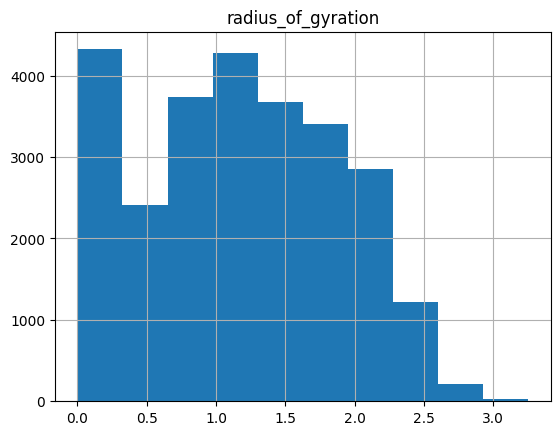

In [19]:
rg_df.hist()

In [15]:
from skmob.measures.individual import maximum_distance

In [16]:
md_df = maximum_distance(tdf)

100%|██████████| 26156/26156 [00:55<00:00, 471.73it/s]


array([[<AxesSubplot:title={'center':'maximum_distance'}>]], dtype=object)

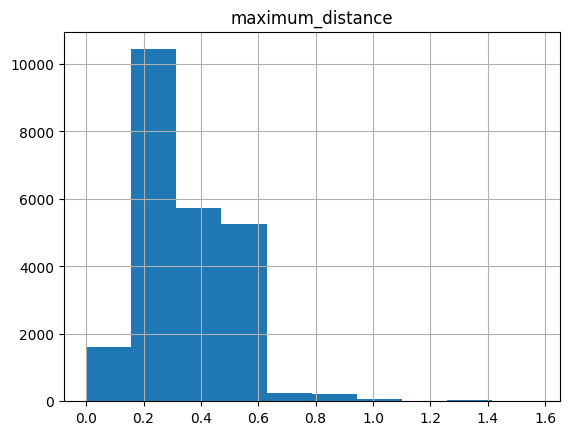

In [18]:
md_df.hist()

In [5]:
from skmob.measures.individual import waiting_times

wt_df = waiting_times(tdf)

100%|██████████| 26156/26156 [00:22<00:00, 1141.43it/s]


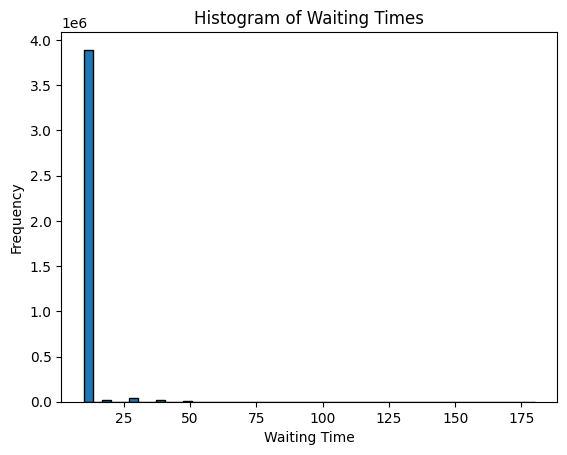

In [9]:
import matplotlib.pyplot as plt

# Desempacotar os arrays de waiting_times em uma única lista de números
all_waiting_times = [time for sublist in wt_df["waiting_times"] for time in sublist]

# Plotar o histograma
plt.hist(all_waiting_times, bins=50, edgecolor="black")
plt.xlabel("Waiting Time")
plt.ylabel("Frequency")
plt.title("Histogram of Waiting Times")
plt.show()